# route optimization

33
Best Route: ['Mumbai Dock', 'Gandhinagar', 'Daman', 'Panaji', 'Kavaratti', 'Thiruvananthapuram', 'Puducherry', 'Chennai', 'Bengaluru', 'Hyderabad', 'Bhopal', 'Raipur', 'Patna', 'Gangtok', 'Dispur', 'Shillong', 'Itanagar', 'Kohima', 'Imphal', 'Aizawl', 'Agartala', 'Kolkata', 'Bhubaneswar', 'Ranchi', 'Lucknow', 'New Delhi', 'Dehradun', 'Chandigarh', 'Shimla', 'Leh', 'Srinagar', 'Jammu', 'Jaipur', 'Mumbai Dock']
Total Distance (in km): 12069.796762854736
Initial Distance(in km):48267.4109561007499


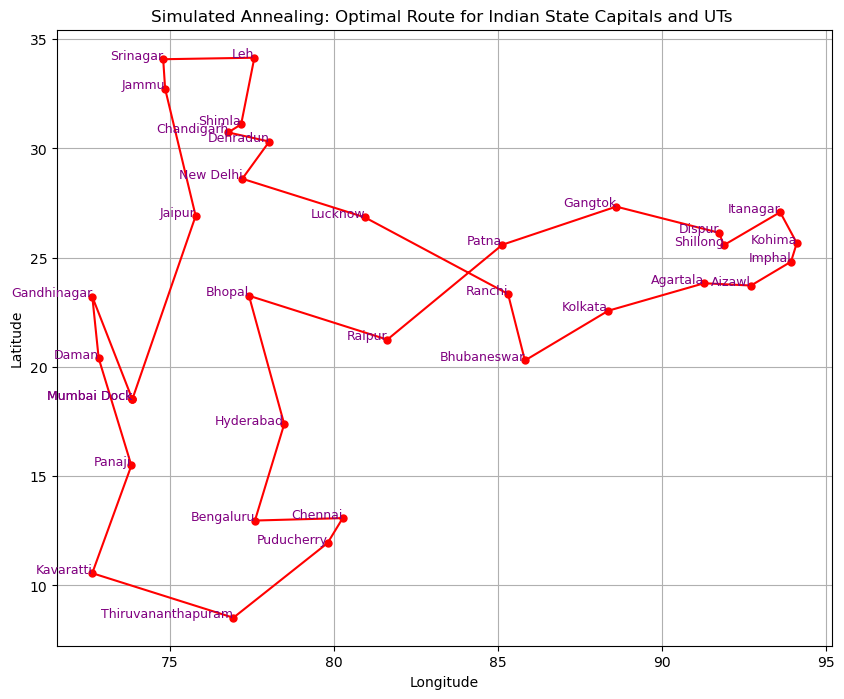

37

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the coordinates (latitude, longitude) of each capital/UT
cities = {

    "Panaji": (15.4909, 73.8278),
    "Daman": (20.3974, 72.8311),
    "Mumbai Dock": (18.5204, 73.8567),
    "Kavaratti": (10.5625, 72.6350),
    "Kolkata": (22.5726, 88.3639),
    "Chennai": (13.0827, 80.2707),
    "Bengaluru": (12.9716, 77.5946),
    "Hyderabad": (17.3850, 78.4867),
    "Gandhinagar" :(23.2156, 72.6369),
    "Jaipur": (26.9124, 75.7873),
    "Lucknow": (26.8467, 80.9462),
    "Chandigarh": (30.7333, 76.7794),
    "Bhopal": (23.2599, 77.4126),
    "Patna": (25.5941, 85.1376),
    "Ranchi": (23.3441, 85.3096),
    "Thiruvananthapuram": (8.5241, 76.9366),
    "Imphal": (24.8176, 93.9368),
    "Shillong": (25.5788, 91.8933),
    "Dispur": (26.1445, 91.7362),
    "Itanagar": (27.0844, 93.6053),
    "Gangtok": (27.3389, 88.6076),
    "Agartala": (23.8315, 91.2868),
    "Aizawl": (23.7270, 92.7176),
    "Kohima": (25.6724, 94.1133),
    "Puducherry": (11.9416, 79.8083),
     "Srinagar":( 34.0837,74.7973),
    'Raipur': (21.2514, 81.6296),
    'Shimla': (31.1048, 77.1734),
    'Bhubaneswar': (20.2961, 85.8245),
    'Dehradun': (30.3165, 78.0322),
    'New Delhi': (28.6139, 77.2090),
    'Leh': (34.1526, 77.5771),
    'Raipur': (21.2514, 81.6296),
    'Shimla': (31.1048, 77.1734),
    'Srinagar': (34.0837, 74.7973),
    'Jammu': (32.7266, 74.8570),


    # Add more cities if necessary
}
print(len(cities))
# Step 2: Calculate the distance between two cities using Haversine Formula
def haversine(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    R = 6371  # Radius of Earth in km
    
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    return R * c

# Step 3: Generate a random route (excluding Mumbai which is fixed at the start and end)
def create_initial_route(cities_list):
    cities_list = [city for city in cities_list if city != "Mumbai Dock"]  # Exclude Mumbai
    route = cities_list[:]
    random.shuffle(route)
    route = ["Mumbai Dock"] + route + ["Mumbai Dock"]  # Start and end at Mumbai
    return route

# Step 4: Calculate the total distance of the route
def calculate_total_distance(route):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += haversine(cities[route[i]], cities[route[i+1]])
    return total_distance

# Step 5: Simulated Annealing Algorithm
def simulated_annealing(cities_list, initial_temperature, cooling_rate, iterations):
    current_route = create_initial_route(cities_list)
    current_distance = calculate_total_distance(current_route)
    
    best_route = list(current_route)
    best_distance = current_distance
    initial_distance=current_distance
    temperature = initial_temperature
    
    for i in range(iterations):
        # Create a neighboring solution by swapping two cities (excluding Mumbai)
        new_route = list(current_route)
        idx1, idx2 = random.sample(range(1, len(cities_list)), 2)  # Only swap cities excluding Mumbai
        new_route[idx1], new_route[idx2] = new_route[idx2], new_route[idx1]
        
        new_distance = calculate_total_distance(new_route)
        
        # Accept the new solution based on the Metropolis criterion
        if new_distance < current_distance or random.uniform(0, 1) < math.exp((current_distance - new_distance) / temperature):
            current_route = list(new_route)
            current_distance = new_distance
            
            # Update the best solution found so far
            if current_distance < best_distance:
                best_route = list(current_route)
                best_distance = current_distance
        
        # Cool down the temperature
        temperature *= cooling_rate
    
    return best_route, best_distance,initial_distance

# Step 6: Parameters and running the algorithm
cities_list = list(cities.keys())
initial_temperature = 10000
cooling_rate = 0.995
iterations = 10000

# Run the Simulated Annealing Algorithm
best_route, best_distance,i_distance = simulated_annealing(cities_list, initial_temperature, cooling_rate, iterations)

# Step 7: Output the results
print("Best Route:", best_route)
print("Total Distance (in km):", best_distance)
print(f'Initial Distance(in km):{i_distance:.13f}')

# Step 8: Visualize the result (optional)
route_coordinates = [cities[city] for city in best_route]
route_coordinates.append(route_coordinates[0])  # Loop back to the start point

# Plotting the route on a map
latitudes, longitudes = zip(*route_coordinates)

plt.figure(figsize=(10, 8))
plt.plot(longitudes, latitudes, marker='o', color='r', linestyle='-', markersize=5, label="Route")
plt.title("Simulated Annealing: Optimal Route for Indian State Capitals and UTs ")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Annotate the cities
for i, city in enumerate(best_route):
    lat, lon = cities[city]
    plt.text(lon, lat, city, fontsize=9, ha='right', color='purple')

plt.show()


In [3]:
import folium

# Step 8: Folium visualization
route_coordinates = [cities[city] for city in best_route]
route_map = folium.Map(location=cities["Mumbai Dock"], zoom_start=5)



# Add smaller circle markers for each city
for idx, city in enumerate(best_route):
    folium.CircleMarker(
        location=cities[city],
        radius=4,  # Smaller size
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.7,
        popup=f"{idx + 1}: {city}",
    ).add_to(route_map)

# Draw the route as a polyline
folium.PolyLine(route_coordinates, color="red", weight=2.5, opacity=1).add_to(route_map)

# Save the map to an HTML file
route_map.save("mego_logistics_optimal_route.html")
print("Route map saved as 'mego_logistics_optimal_route.html'.")






Route map saved as 'mego_logistics_optimal_route.html'.


# Shipment Allocation

In [2]:
import csv

# Define the CSV file name
csv_filename = "shipment_allocation.csv"

# Define the data
shipment_allocation = [
    ["State/UT", "Destination", "Item","Stop_Order"],
    ["Andhra Pradesh", "Amaravati", "Traditional sarees and ethnic wear"],
    ["Arunachal Pradesh", "Itanagar", "Winter essentials"],
    ["Assam", "Dispur", "Lightweight cotton clothing"],
    ["Bihar", "Patna", "Formal office wear"],
    ["Chhattisgarh", "Raipur", "Comfortable and casual clothing"],
    ["Goa", "Panaji", "Summer and beachwear"],
    ["Gujarat", "Gandhinagar", "Vibrant festive wear"],
    ["Haryana", "Chandigarh", "Activewear"],
    ["Himachal Pradesh", "Shimla", "Heavy-duty winter gear"],
    ["Jharkhand", "Ranchi", "Everyday casual clothing"],
    ["Karnataka", "Bengaluru", "Trendy and modern urban fashion"],
    ["Kerala", "Thiruvananthapuram", "Cotton and linen wear"],
    ["Madhya Pradesh", "Bhopal", "Multi-purpose clothing"],
    ["Maharashtra", "Mumbai Dock", "Central warehouse and dispatch hub"],
    ["Manipur", "Imphal", "Traditional handwoven garments"],
    ["Meghalaya", "Shillong", "Rain-resistant apparel"],
    ["Mizoram", "Aizawl", "Ceremonial and cultural attire"],
    ["Nagaland", "Kohima", "Accessories"],
    ["Odisha", "Bhubaneswar", "Ethnic and casual wear"],
    ["Punjab", "Chandigarh", "Thermal wear"],
    ["Rajasthan", "Jaipur", "Designer lehengas and sarees"],
    ["Sikkim", "Gangtok", "Hiking and trekking gear"],
    ["Tamil Nadu", "Chennai", "Light cotton wear"],
    ["Telangana", "Hyderabad", "Modern fashion"],
    ["Tripura", "Agartala", "Handloom sarees"],
    ["Uttar Pradesh", "Lucknow", "Chikankari embroidery wear"],
    ["Uttarakhand", "Dehradun", "Outdoor and trekking apparel"],
    ["West Bengal", "Kolkata", "Festive sarees"],
    # Union Territories
    ["Andaman and Nicobar Islands", "Port Blair", "Light beachwear"],
    ["Chandigarh", "Chandigarh", "Versatile casual clothing"],
    ["Dadra and Nagar Haveli and Daman and Diu", "Daman", "Summer-friendly outfits"],
    ["Delhi", "New Delhi", "Modern and chic urban fashion"],
    ["Jammu and Kashmir", "Srinagar/Jammu", "Thermal wear and woolen clothing"],
    ["Ladakh", "Leh", "Adventure gear"],
    ["Lakshadweep", "Kavaratti", "Light cotton wear"],
    ["Puducherry", "Puducherry", "Relaxed summer clothing"]
]
print(len(shipment_allocation))




37


In [4]:
for index, city in enumerate(best_route, start=1):
    for row in shipment_allocation[1:]:  # Skip the header row
        if city == row[1]:  # Check if city matches the Destination column
            print(index,row[0],':', city, ':',row[2]) 

    

NameError: name 'best_route' is not defined

In [7]:
output_file = "shipment_routes.csv"

# Open the CSV file in write mode
with open(output_file, mode="w", newline="") as file:
    writer = csv.writer(file)
    
    # Write the header row
    writer.writerow(["Stop_Order", "City",'State', "Item"])
    
    # Iterate through the best_route list and match with shipment_allocation
    for index, city in enumerate(best_route, start=1):
        for row in shipment_allocation[1:]:  # Skip the header row
            if city == row[1]:  # Match city with Destination column
                writer.writerow([index, city, row[0],row[2]])  # Write to CSV

print(f"Data successfully saved to {output_file}!")

Data successfully saved to shipment_routes.csv!


In [9]:
import pandas as pd
 
# Load shipment data
df = pd.read_csv("shipment_routes.csv")
 
# Sort in reverse order (last stop first)
df_sorted = df.sort_values(by="Stop_Order", ascending=False)
 
# Save the optimized loading plan
df_sorted.to_csv("optimized_loading_plan.csv", index=False)
 
print("Loading plan created successfully! 🚛")

Loading plan created successfully! 🚛


### The Volvo FH16 is a popular heavy-duty truck used for long-haul logistics and transportation. Here's more information about the Volvo FH16:

#### Fuel Tank Capacity:
The Volvo FH16 typically has a fuel tank capacity of around 500 to 1,000 liters, depending on the configuration and the number of fuel tanks.
Most common configurations include 2 fuel tanks, with each tank typically holding between 250 to 500 liters, allowing for a total capacity of up to 1,000 liters.
 #### Fuel Efficiency:
The fuel efficiency of a Volvo FH16 varies depending on the weight of the cargo, road conditions, and driving style, but on average, these trucks can achieve 6 to 8 km per liter of fuel.

In [23]:
cost_of_fuel_in_mumbai = 103.50  # Cost per liter in Rupees
fuel_efficiency = 7    # Average fuel efficiency in km per liter

# Assuming best_distance is the total distance for the route
total_liters = best_distance / fuel_efficiency

print(f'Total number of liters the vehicle may require: {total_liters} L')

dist = []  # To store the distances between cities
refuelin = 1000  # Threshold for refueling
total_distance = 0  # To accumulate the total distance
tot_dist=0
for i in range(len(best_route)-1 ):
    tot_dist=0
    segment_distance = haversine(cities[best_route[i]], cities[best_route[i+1]])
    total_distance += segment_distance
    dist.append(segment_distance)
    tot_dist+= segment_distance
    # Check if the accumulated distance exceeds the refuel threshold
    if tot_dist > 1000:
        print(f"Refuel at city {best_route[i+1]} after traveling {total_distance} km.")
        tot_dist = 0  # Reset distance for the next segment

print(f"Total distances between cities: {total_distance} ")

# Calculate the total fuel cost for the route
fuel_cost = total_liters * cost_of_fuel_in_mumbai
print(f'The fuel cost comes up to be: {fuel_cost} Rupees')


Total number of liters the vehicle may require: 1724.2566804078194 L
Total distances between cities: 12069.796762854736 
The fuel cost comes up to be: 178460.56642220932 Rupees
